# Project Goal

The goal of this project is to take thousands of Amazon product reviews and segment to only include reviews on Nike products. 
Based off this segmentation we want to be able to perform topic modeling and data clustering to gain valuable product and marketing insights.

## Part 1: Importing and Extracting the Data

In [ ]:
import pickle
import json
from time import sleep
import gzip
import itertools
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We are first going to load the files in as a typical python dictionary for both files. For this first one, we will filter to only use nike related reviews.

In [ ]:
##this assigns the filename we're trying to load in to a string variable
working_directory = 'drive/MyDrive/Marketing_Unsupervised_Learning/Final_Project'
working_file = '%s/meta_Clothing_Shoes_and_Jewelry.jsonl.gz' % working_directory
loadedjson = open(working_file, 'r')

In [ ]:
asins = []
with gzip.open("drive/MyDrive/Marketing_Unsupervised_Learning/Final_Project/meta_Clothing_Shoes_and_Jewelry.jsonl.gz") as products:
    for product in products:
        data = json.loads(product)
        categories = [c.lower() for c in
                      list(itertools.chain(*data.get("categories", [])))]
        if "nike" in categories:
            asins.append(data["asin"])
  

The correct length is 8327, to give us a sanity check.

In [ ]:
len(asins)

8327

In [ ]:
outputfile = open('%s/allasins.txt' % working_directory, 'w')

outputfile.write(','.join(asins))
outputfile.close()

We will now load the "reviews" file in and combine it with our asins nike file, to only include nike reviews.

In [ ]:
!wget http://128.138.93.164/reviews_Clothing_Shoes_and_Jewelry.json.gz -P /content/drive/MyDrive/MSDS_marketing_text_analytics/master_files/2_topic_modeling

--2022-05-29 13:32:12--  http://128.138.93.164/reviews_Clothing_Shoes_and_Jewelry.json.gz
Connecting to 128.138.93.164:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 888065454 (847M) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/MSDS_marketing_text_analytics/master_files/2_topic_modeling/reviews_Clothing_Shoes_and_Jewelry.json.gz’

reviews_Clothing_Sh 100%[===================>] 846.92M  26.1MB/s    in 22s     

2022-05-29 13:32:35 (37.7 MB/s) - ‘/content/drive/MyDrive/MSDS_marketing_text_analytics/master_files/2_topic_modeling/reviews_Clothing_Shoes_and_Jewelry.json.gz’ saved [888065454/888065454]



In [ ]:
!gzip -d /content/drive/MyDrive/MSDS_marketing_text_analytics/master_files/2_topic_modeling/reviews_Clothing_Shoes_and_Jewelry.json.gz

In [ ]:
##this assigns the filename we're trying to load in to a string variable
working_directory = '/content/drive/MyDrive/MSDS_marketing_text_analytics/master_files/2_topic_modeling'
working_file = '%s/reviews_Clothing_Shoes_and_Jewelry.json' % working_directory
loadedjson = open(working_file, 'r')

In [ ]:
#Step 2 - Parsing the review data
#Let's load the review data into a dictionary. It's the exact same process
#as loading the review data
count = 0
allreviews = {}
for aline in loadedjson:
   count += 1
   if count % 100000 == 0:
       print(count)
   areview = eval(aline)
#    #I'm arbitrarily using the iteration count as the key for the dictionary
#    #but you don't have to do this
   allreviews[count] = areview
   
#how many reviews do we have?
print(len(allreviews))
#

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5748920


In [ ]:
nikereviews = {}
count = 0
for areview in allreviews:
   count += 1
   if count % 100000 == 0:
       print(count/5748920)      
   #setting current review as a dictionary, so we can easily reference its
   #entries
   thereview = allreviews[areview]
   theasin = thereview['asin']
   reviewerid = thereview['reviewerID']
   if theasin in asins:
       #im setting the key here as something unique. if we just did by asin
       #we'd only have one review for each asin, with the last review the only
       #one being stored
       thekey = '%s.%s' % (theasin, reviewerid)
       nikereviews[thekey] = thereview


# #that's it! all Nike reviews are stored nikereviews!
# #how many Nike reviews do we have?
# print(len(nikereviews))
        
#let's save our data as a JSON dictionary
#json.dump(nikereviews, open('%s/allnikereviews.json' % working_directory, 'w'))

0.017394571502125616
0.03478914300425123
0.05218371450637685
0.06957828600850247
0.08697285751062808
0.1043674290127537
0.12176200051487931
0.13915657201700493
0.15655114351913055
0.17394571502125616
0.19134028652338178
0.2087348580255074
0.226129429527633
0.24352400102975863
0.2609185725318843
0.27831314403400986
0.2957077155361355
0.3131022870382611
0.33049685854038674
0.34789143004251233
0.365286001544638
0.38268057304676356
0.4000751445488892
0.4174697160510148
0.43486428755314044
0.452258859055266
0.46965343055739167
0.48704800205951726
0.5044425735616429
0.5218371450637685
0.5392317165658941
0.5566262880680197
0.5740208595701454
0.591415431072271
0.6088100025743965
0.6262045740765222
0.6435991455786478
0.6609937170807735
0.678388288582899
0.6957828600850247
0.7131774315871503
0.730572003089276
0.7479665745914015
0.7653611460935271
0.7827557175956528
0.8001502890977784
0.8175448605999039
0.8349394321020296
0.8523340036041552
0.8697285751062809
0.8871231466084064
0.904517718110532


In [ ]:
working_directory = 'drive/MyDrive/Marketing_Unsupervised_Learning/Final_Project'
#print(len(nikereviews))

In [ ]:
#json.dump(nikereviews, open('%s/allnikereviews.json' % working_directory, 'w'))

In [ ]:
json_path = "%s/allnikereviews.json" % working_directory

In [ ]:
json_file = json.load(open(json_path, 'r'))

for a_review in json_file:
  the_review = json_file[a_review]

In [ ]:
the_review

{'asin': 'B00L5K86LO',
 'helpful': [0, 0],
 'overall': 5.0,
 'reviewText': 'Love it !',
 'reviewTime': '07 20, 2014',
 'reviewerID': 'A1KBC812A7RSY9',
 'reviewerName': 'B',
 'summary': 'So CUTE',
 'unixReviewTime': 1405814400}

# Preprocessing the Text

In [ ]:
import os
import matplotlib

In [ ]:
try:
  import tmtoolkit
except:
  !pip install tmtoolkit
  os.kill(os.getpid(), 9)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.1 MB 9.4 MB/s 
     |████████████████████████████████| 9.5 MB 50.3 MB/s 
     |████████████████████████████████| 10.4 MB 57.1 MB/s 
     |████████████████████████████████| 96 kB 5.9 MB/s 
     |████████████████████████████████| 25.9 MB 1.6 MB/s 
     |████████████████████████████████| 11.5 MB 58.0 MB/s 
     |████████████████████████████████| 1.0 MB 33.5 MB/s 
  Created wheel for globre: filename=globre-0.1.5-py3-none-any.whl size=19546 sha256=5c1a99db2b7acb98a0717882c33d156d66bc9478f07f62a98733ef0d9e3afcc7
  Stored in directory: /root/.cache/pip/wheels/40/95/37/5303ce04fce53b6e64ed74a3f0a0e9ea11c348cac0c5c42a76
Successfully built globre
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: xlrd
    Found existing installation: xlr

In [ ]:
import nltk
import random
import numpy as np
from tmtoolkit.corpus import Corpus
import json
import pickle
import scipy.sparse

In [ ]:
corpus = Corpus()
for i, a_review in enumerate(json_file):
  the_review = json_file[a_review]
  corpus.add_doc(str(i), the_review['reviewText'])

In [ ]:
print(len(corpus))

21570


In [ ]:
from tmtoolkit.preprocess import TMPreproc

preproc = TMPreproc(corpus, language='en')
preproc.pos_tag()
preproc.lemmatize()
preproc.tokens_to_lowercase()
preproc.remove_special_chars_in_tokens()
preproc.add_stopwords(['http', 'nt'])

/usr/local/lib/python3.7/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.7). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


<TMPreproc [21570 documents / en]>

In [ ]:
preproc.tokens['91']

['these',
 'watch',
 'have',
 'buy',
 'for',
 'its',
 'girlfriend',
 '',
 'such',
 'accessory',
 'not',
 'to',
 'find',
 'in',
 'russia',
 '',
 'alas',
 'nike',
 'do',
 'not',
 'trade',
 '',
 'when',
 'she',
 'have',
 'get',
 'and',
 'parcel',
 'of',
 'land',
 '',
 'they',
 'seem',
 'very',
 'small',
 'and',
 'on',
 'baby',
 'hand',
 '',
 'but',
 'each',
 'woman',
 'pay',
 'attention',
 'to',
 'her',
 'hand',
 'and',
 'i',
 'caughte',
 'the',
 'glance',
 'of',
 'the',
 'man',
 'on',
 'her',
 'hand',
 '',
 'the',
 'product',
 'perfect',
 '',
 'reliable',
 '',
 'stylish',
 '',
 'the',
 'price',
 'funny',
 '',
 'quality',
 'excellent',
 '',
 'will',
 'suit',
 'for',
 'any',
 'young',
 'girl',
 '',
 'which',
 'concern',
 'with',
 'the',
 'sport',
 'and',
 'active',
 'rest',
 '',
 'you',
 'may',
 'be',
 'calm',
 'for',
 'her',
 'watch',
 'and',
 'beauty',
 '',
 'alex']

In [ ]:
preproc.vocabulary_size

19202

In [ ]:
preproc.tokens_datatable

,doc,position,token,lemma,pos,whitespace
0,0,0,the,the,DET,True
1,0,1,colour,colour,NOUN,True
2,0,2,i,i,PRON,True
3,0,3,receive,receive,VERB,True
4,0,4,be,be,AUX,True
...,...,...,...,...,...,...
58,9999,58,this,this,DET,True
59,9999,59,purchase,purchase,NOUN,True
60,9999,60,be,be,AUX,True
61,9999,61,a,a+,DET,False


In [ ]:
preproc_smaller = preproc.copy() 
preproc_smaller.filter_for_pos('N', 'V', 'ADJ')
preproc_smaller.clean_tokens(remove_numbers=True, remove_shorter_than=2)
preproc_smaller.remove_common_tokens(df_threshold=0.8)
preproc_smaller.remove_uncommon_tokens(df_threshold=0.01)

print(preproc.vocabulary_size)
print(preproc_smaller.vocabulary_size)

19202
202


In [ ]:
preproc_smaller.tokens_datatable

,doc,position,token,lemma,pos,whitespace
0,0,0,receive,receive,VERB,True
1,0,1,blue,blue,ADJ,True
2,0,2,show,show,VERB,True
3,0,3,change,change,VERB,True
4,0,4,get,get,VERB,True
...,...,...,...,...,...,...
5,9999,5,find,find,VERB,True
6,9999,6,good,good,ADJ,True
7,9999,7,ship,ship,VERB,True
8,9999,8,quickly,quickly,ADV,True


In [ ]:
print(preproc.tokens['91'])
print(preproc_smaller.tokens['91'])
print(preproc.tokens['1'])
print(preproc_smaller.tokens['1'])
print(preproc.tokens['2000'])
print(preproc_smaller.tokens['2000'])

['these', 'watch', 'have', 'buy', 'for', 'its', 'girlfriend', '', 'such', 'accessory', 'not', 'to', 'find', 'in', 'russia', '', 'alas', 'nike', 'do', 'not', 'trade', '', 'when', 'she', 'have', 'get', 'and', 'parcel', 'of', 'land', '', 'they', 'seem', 'very', 'small', 'and', 'on', 'baby', 'hand', '', 'but', 'each', 'woman', 'pay', 'attention', 'to', 'her', 'hand', 'and', 'i', 'caughte', 'the', 'glance', 'of', 'the', 'man', 'on', 'her', 'hand', '', 'the', 'product', 'perfect', '', 'reliable', '', 'stylish', '', 'the', 'price', 'funny', '', 'quality', 'excellent', '', 'will', 'suit', 'for', 'any', 'young', 'girl', '', 'which', 'concern', 'with', 'the', 'sport', 'and', 'active', 'rest', '', 'you', 'may', 'be', 'calm', 'for', 'her', 'watch', 'and', 'beauty', '', 'alex']
['buy', 'find', 'get', 'seem', 'small', 'pay', 'perfect', 'stylish', 'excellent', 'may']
['very', 'cute', 'and', 'be', 'really', 'practical', '', 'fit', 'well', 'on', 'small', 'wrist', 'which', 'be', 'my', 'case', '', 'i', '

In [ ]:
doc_labels = np.array(preproc.doc_labels)
doc_labels[:10]

array(['0', '1', '10', '100', '1000', '10000', '10001', '10002', '10003',
       '10004'], dtype='<U5')

In [ ]:
vocab_bg = np.array(preproc.vocabulary)
vocab_sm = np.array(preproc_smaller.vocabulary) 

In [ ]:
dtm_bg = preproc.dtm
dtm_sm = preproc_smaller.dtm

dtm_bg, dtm_sm

(<21570x19202 sparse matrix of type '<class 'numpy.int32'>'
 	with 743562 stored elements in Compressed Sparse Row format>,
 <21570x202 sparse matrix of type '<class 'numpy.int32'>'
 	with 179630 stored elements in Compressed Sparse Row format>)

In [ ]:
pickle.dump(doc_labels, open('%s/doc_labels.p' % working_directory, 'wb'))

scipy.sparse.save_npz('%s/small_dtm.npz' % working_directory, dtm_sm)
scipy.sparse.save_npz('%s/big_dtm.npz' % working_directory, dtm_bg)

pickle.dump(vocab_bg, open('%s/big_vocab.p' % working_directory, 'wb'))
pickle.dump(vocab_sm, open('%s/small_vocab.p' % working_directory, 'wb'))

pickle.dump(corpus, open('%s/corpus.p' % working_directory, 'wb') )

# Filter and Preprocess again using positve and negative reviews

In [ ]:
working_directory = 'drive/MyDrive/Marketing_Unsupervised_Learning/Final_Project'
json_path = "%s/allnikereviews.json" % working_directory

In [ ]:
from time import sleep
json_file = json.load(open(json_path, 'r'))

In [ ]:
df = pd.read_json('drive/MyDrive/Marketing_Unsupervised_Learning/Final_Project/allnikereviews.json', orient='index')

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
B0000V9K32.ACT5DY536GISV,ACT5DY536GISV,B0000V9K32,"gaby ""gaby""","[2, 5]",the colour i received is not blue as shown but...,3,not the colour,1248652800,"07 27, 2009"
B0000V9K32.A3BVWMS9I8OH8U,A3BVWMS9I8OH8U,B0000V9K32,Tatiana A. Alencar,"[0, 0]",Very cute and is really practical. Fits better...,5,Cute and practical!,1261785600,"12 26, 2009"
B0000V9K3W.A5RZS69KSJH00,A5RZS69KSJH00,B0000V9K3W,"Tackleberry ""Tack""","[0, 0]",The watch was exactly what i ordered and I got...,4,"Great watch, just too big",1256342400,"10 24, 2009"
B0000V9K46.A3F8O512N9UNVM,A3F8O512N9UNVM,B0000V9K46,"D. Pando ""-d""","[0, 1]","This product came promptly and as described, p...",5,Just as described!,1206489600,"03 26, 2008"
B0000V9KNM.A2EAKTCKFRF7A4,A2EAKTCKFRF7A4,B0000V9KNM,Lane Meyers,"[1, 1]",Why isn't Nike making these anymore? I love t...,4,Great watch,1321401600,"11 16, 2011"


In [ ]:
positive = df[(df['overall'] == 5)]

In [ ]:
pos = positive.reset_index(drop=True)

In [ ]:
pos.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A3BVWMS9I8OH8U,B0000V9K32,Tatiana A. Alencar,"[0, 0]",Very cute and is really practical. Fits better...,5,Cute and practical!,1261785600,"12 26, 2009"
1,A3F8O512N9UNVM,B0000V9K46,"D. Pando ""-d""","[0, 1]","This product came promptly and as described, p...",5,Just as described!,1206489600,"03 26, 2008"
2,A1EDPEDXSQ78G4,B0000V9KRI,SO,"[0, 0]","I love this watch, i use every day, every wher...",5,Love this Watch,1267920000,"03 7, 2010"
3,A2RBU58FQTO2MV,B0000V9KRS,Alejandra Martinez,"[0, 0]",I totally love this watch. It is much nicer an...,5,Love it,1200355200,"01 15, 2008"
4,A230355M4EY767,B00012O2LA,LJR,"[1, 1]",I own three of these watches. They are perfect...,5,my favorite watch - ever!,1252800000,"09 13, 2009"
5,A2V3OLQ10CGWLN,B00012O2MO,"Christina Lou ""~Christina~""","[1, 1]",My best friend has this watch and uses it for ...,5,great watch!,1203033600,"02 15, 2008"
6,AXN13FXXKRZDH,B00012O2MO,"Pepper ""booklover""","[3, 3]",I have used a similar watch (Arctic Blue) for ...,5,Nike Presto Medium Cee,1200441600,"01 16, 2008"
7,A18GGD59BKK1V9,B00012O2O2,Heidi Stettner,"[0, 0]",I've had several of these watches in various c...,5,very nice watch,1285286400,"09 24, 2010"
8,A2RT3G75H4UCFE,B00012O2O2,Molly Perry,"[3, 3]",This is a great little watch for the price. I ...,5,love it,1266192000,"02 15, 2010"
9,AJNWYUFHUCMUM,B00012O2R4,Martha Martinez,"[0, 0]","Very nice watch for a teenager, it has a prett...",5,Very nice!,1209772800,"05 3, 2008"


In [ ]:
negative = df[(df['overall'] == 1)]

In [ ]:
pos1 = pos.T

In [ ]:
pos1

,0,1,2,3,4,5,6,7,8,9,...,13789,13790,13791,13792,13793,13794,13795,13796,13797,13798
reviewerID,A3BVWMS9I8OH8U,A3F8O512N9UNVM,A1EDPEDXSQ78G4,A2RBU58FQTO2MV,A230355M4EY767,A2V3OLQ10CGWLN,AXN13FXXKRZDH,A18GGD59BKK1V9,A2RT3G75H4UCFE,AJNWYUFHUCMUM,...,A36C55GJQ3YZMA,ARFG7GHVM4NYI,A35YZ95BZMR0WK,A29NVAHXMU2A35,A8XDRRGJYXI8V,AQOZEPFW4HTAR,A3H37LNK1EFP7C,A1N0CN53K1G2RW,AP318RPSIQQFA,A1KBC812A7RSY9
asin,B0000V9K32,B0000V9K46,B0000V9KRI,B0000V9KRS,B00012O2LA,B00012O2MO,B00012O2MO,B00012O2O2,B00012O2O2,B00012O2R4,...,B00KHCFOE8,B00KKG14AO,B00KL4PGSG,B00KO3M4T8,B00KPZ64J6,B00KRENKNS,B00KXBJQ1A,B00L01ML5K,B00L2ADWCA,B00L5K86LO
reviewerName,Tatiana A. Alencar,"D. Pando ""-d""",SO,Alejandra Martinez,LJR,"Christina Lou ""~Christina~""","Pepper ""booklover""",Heidi Stettner,Molly Perry,Martha Martinez,...,susana corletto,Rell,Samson the great,jacob lanigan,Dragon,carolyn brown,Hugo Ramos,Ciana,anthony torrance,B
helpful,"[0, 0]","[0, 1]","[0, 0]","[0, 0]","[1, 1]","[1, 1]","[3, 3]","[0, 0]","[3, 3]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
reviewText,Very cute and is really practical. Fits better...,"This product came promptly and as described, p...","I love this watch, i use every day, every wher...",I totally love this watch. It is much nicer an...,I own three of these watches. They are perfect...,My best friend has this watch and uses it for ...,I have used a similar watch (Arctic Blue) for ...,I've had several of these watches in various c...,This is a great little watch for the price. I ...,"Very nice watch for a teenager, it has a prett...",...,Very cute shirt,Looks good. Feels good. Fits good. Great Buy.....,Beautiful sneaker boots. Weather resistant is ...,I ordered these and got a size to small other ...,"The shoes are Great, I never buy Shox due to t...",love it,They fit perfect and the are really light,The product was shipped in record speed! I lov...,I like this item but they didn't have my size ...,Love it !
overall,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
summary,Cute and practical!,Just as described!,Love this Watch,Love it,my favorite watch - ever!,great watch!,Nike Presto Medium Cee,very nice watch,love it,Very nice!,...,nice,Good buy!!tru to size!!,Sneaker boots,love it but the size was to small,Great Pair of shoes.,Five Stars,Five Stars,I love these Nikes,airmax,So CUTE
unixReviewTime,1261785600,1206489600,1267920000,1200355200,1252800000,1203033600,1200441600,1285286400,1266192000,1209772800,...,1405382400,1402444800,1403913600,1403740800,1405209600,1405382400,1405900800,1404604800,1404172800,1405814400
reviewTime,"12 26, 2009","03 26, 2008","03 7, 2010","01 15, 2008","09 13, 2009","02 15, 2008","01 16, 2008","09 24, 2010","02 15, 2010","05 3, 2008",...,"07 15, 2014","06 11, 2014","06 28, 2014","06 26, 2014","07 13, 2014","07 15, 2014","07 21, 2014","07 6, 2014","07 1, 2014","07 20, 2014"


In [ ]:
neg = negative.reset_index(drop=True)

In [ ]:
b = neg.to_dict(orient = 'index')

In [ ]:
len(b)

1243

In [ ]:
json_file1 = a

for a_review in json_file1:
  the_review = json_file1[a_review]

In [ ]:
the_review

{'asin': 'B00L5K86LO',
 'helpful': [0, 0],
 'overall': 5,
 'reviewText': 'Love it !',
 'reviewTime': '07 20, 2014',
 'reviewerID': 'A1KBC812A7RSY9',
 'reviewerName': 'B',
 'summary': 'So CUTE',
 'unixReviewTime': 1405814400}

In [ ]:
a = pos.to_dict(orient = 'index')

In [ ]:
json_file = a

for a_review in json_file:
  the_review = json_file[a_review]

In [ ]:
the_review

{'asin': 'B00L5K86LO',
 'helpful': [0, 0],
 'overall': 5,
 'reviewText': 'Love it !',
 'reviewTime': '07 20, 2014',
 'reviewerID': 'A1KBC812A7RSY9',
 'reviewerName': 'B',
 'summary': 'So CUTE',
 'unixReviewTime': 1405814400}

In [ ]:
a.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [ ]:
corpus1 = Corpus()
for i, a_review in enumerate(a):
  the_review = a[a_review]
  corpus1.add_doc(str(i), the_review['reviewText'])

In [ ]:
print(len(corpus1))

13799


In [ ]:
from tmtoolkit.preprocess import TMPreproc

preproc = TMPreproc(corpus1, language='en')
preproc.pos_tag()
preproc.lemmatize()
preproc.tokens_to_lowercase()
preproc.remove_special_chars_in_tokens()
preproc.add_stopwords(['http', 'nt'])

/usr/local/lib/python3.7/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.7). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


<TMPreproc [13799 documents / en]>

In [ ]:
preproc_smaller = preproc.copy() 
preproc_smaller.filter_for_pos('N', 'V', 'ADJ')
preproc_smaller.clean_tokens(remove_numbers=True, remove_shorter_than=2)
preproc_smaller.remove_common_tokens(df_threshold=0.8)
preproc_smaller.remove_uncommon_tokens(df_threshold=0.01)

print(preproc.vocabulary_size)
print(preproc_smaller.vocabulary_size)

14135
185


In [ ]:
vocab_bg_pos = np.array(preproc.vocabulary)
vocab_sm_pos = np.array(preproc_smaller.vocabulary) 

In [ ]:
dtm_bg_pos = preproc.dtm
dtm_sm_pos = preproc_smaller.dtm

dtm_bg_pos, dtm_sm_pos

(<13799x14135 sparse matrix of type '<class 'numpy.int32'>'
 	with 443032 stored elements in Compressed Sparse Row format>,
 <13799x185 sparse matrix of type '<class 'numpy.int32'>'
 	with 107796 stored elements in Compressed Sparse Row format>)

In [ ]:
doc_labels = np.array(preproc.doc_labels)
doc_labels[:10]

array(['0', '1', '10', '100', '1000', '10000', '10001', '10002', '10003',
       '10004'], dtype='<U5')

In [ ]:
pickle.dump(doc_labels, open('%s/doc_labels_pos.p' % working_directory, 'wb'))

scipy.sparse.save_npz('%s/small_dtm_pos.npz' % working_directory, dtm_sm_pos)
scipy.sparse.save_npz('%s/big_dtm_pos.npz' % working_directory, dtm_bg_pos)

pickle.dump(vocab_bg_pos, open('%s/big_vocab_pos.p' % working_directory, 'wb'))
pickle.dump(vocab_sm_pos, open('%s/small_vocab_pos.p' % working_directory, 'wb'))

pickle.dump(corpus1, open('%s/corpus1.p' % working_directory, 'wb') )

In [ ]:
corpus2 = Corpus()
for i, a_review in enumerate(b):
  the_review = b[a_review]
  corpus2.add_doc(str(i), the_review['reviewText'])

In [ ]:
print(len(corpus2))

1243


In [ ]:
from tmtoolkit.preprocess import TMPreproc

preproc = TMPreproc(corpus2, language='en')
preproc.pos_tag()
preproc.lemmatize()
preproc.tokens_to_lowercase()
preproc.remove_special_chars_in_tokens()
preproc.add_stopwords(['http', 'nt'])

/usr/local/lib/python3.7/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.7). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


<TMPreproc [1243 documents / en]>

In [ ]:
preproc_smaller = preproc.copy() 
preproc_smaller.filter_for_pos('N', 'V', 'ADJ')
preproc_smaller.clean_tokens(remove_numbers=True, remove_shorter_than=2)
preproc_smaller.remove_common_tokens(df_threshold=0.8)
preproc_smaller.remove_uncommon_tokens(df_threshold=0.01)

print(preproc.vocabulary_size)
print(preproc_smaller.vocabulary_size)

4722
274


In [ ]:
vocab_bg_neg = np.array(preproc.vocabulary)
vocab_sm_neg = np.array(preproc_smaller.vocabulary) 

In [ ]:
dtm_bg_neg = preproc.dtm
dtm_sm_neg = preproc_smaller.dtm

dtm_bg_neg, dtm_sm_neg

(<1243x4722 sparse matrix of type '<class 'numpy.int32'>'
 	with 52979 stored elements in Compressed Sparse Row format>,
 <1243x274 sparse matrix of type '<class 'numpy.int32'>'
 	with 12974 stored elements in Compressed Sparse Row format>)

In [ ]:
doc_labels = np.array(preproc.doc_labels)
doc_labels[:10]

array(['0', '1', '10', '100', '1000', '1001', '1002', '1003', '1004',
       '1005'], dtype='<U4')

In [ ]:
pickle.dump(doc_labels, open('%s/doc_labels_neg.p' % working_directory, 'wb'))

scipy.sparse.save_npz('%s/small_dtm_neg.npz' % working_directory, dtm_sm_neg)
scipy.sparse.save_npz('%s/big_dtm_neg.npz' % working_directory, dtm_bg_neg)

pickle.dump(vocab_bg_neg, open('%s/big_vocab_neg.p' % working_directory, 'wb'))
pickle.dump(vocab_sm_neg, open('%s/small_vocab_neg.p' % working_directory, 'wb'))

pickle.dump(corpus2, open('%s/corpus2.p' % working_directory, 'wb') )

# Importing DTM

In [ ]:
try:
  from tmtoolkit.topicmod.tm_lda import compute_models_parallel
except: 
  !pip install tmtoolkit['lda']
  from tmtoolkit.topicmod.tm_lda import compute_models_parallel

In [ ]:
import pickle
import scipy.sparse
import logging
import warnings

In [ ]:
try:
  from lda import LDA
except: 
  !pip install lda

In [ ]:
working_directory = '/content/drive/MyDrive/Marketing_Unsupervised_Learning/Final_Project'

doc_labels = pickle.load(open('%s/doc_labels.p' % working_directory, 'rb'))
dtm_sm = scipy.sparse.load_npz('%s/small_dtm.npz' % working_directory)
dtm_bg = scipy.sparse.load_npz('%s/big_dtm.npz' % working_directory)

vocab_bg = pickle.load(open('%s/big_vocab.p' % working_directory, 'rb'))
vocab_sm = pickle.load(open('%s/small_vocab.p' % working_directory, 'rb'))

In [ ]:
doc_labels_pos = pickle.load(open('%s/doc_labels_pos.p' % working_directory, 'rb'))
dtm_sm_pos = scipy.sparse.load_npz('%s/small_dtm_pos.npz' % working_directory)
dtm_bg_pos = scipy.sparse.load_npz('%s/big_dtm_pos.npz' % working_directory)

vocab_bg_pos = pickle.load(open('%s/big_vocab_pos.p' % working_directory, 'rb'))
vocab_sm_pos = pickle.load(open('%s/small_vocab_pos.p' % working_directory, 'rb'))

In [ ]:
doc_labels_neg = pickle.load(open('%s/doc_labels_neg.p' % working_directory, 'rb'))
dtm_sm_neg = scipy.sparse.load_npz('%s/small_dtm_neg.npz' % working_directory)
dtm_bg_neg = scipy.sparse.load_npz('%s/big_dtm_neg.npz' % working_directory)

vocab_bg_neg = pickle.load(open('%s/big_vocab_neg.p' % working_directory, 'rb'))
vocab_sm_neg = pickle.load(open('%s/small_vocab_neg.p' % working_directory, 'rb'))

# Creating Models

In [ ]:
# suppress the "INFO" messages and warnings from lda
logger = logging.getLogger('lda')
logger.addHandler(logging.NullHandler())
logger.propagate = False
warnings.filterwarnings('ignore')

In [ ]:
# set data to use
dtms = {
    'bigger': dtm_bg,
    'smaller': dtm_sm,
    'bigger positive': dtm_bg_pos,
    'smaller positive': dtm_sm_pos,
    'bigger negative': dtm_bg_neg,
    'smaller negative': dtm_sm_neg
}

# and fixed hyperparameters
# Here, alpha represents document-topic density - with a higher alpha, documents
# are made up of more topics, and with lower alpha, documents contain fewer topics.
#Beta represents topic-word density - with a high beta, topics are made up of 
#most of the words in the corpus, and with a low beta they consist of few words.
# https://www.thoughtvector.io/blog/lda-alpha-and-beta-parameters-the-intuition/
lda_params = {
    'n_topics': 16,
    'eta': .01,
    'n_iter': 500,
    'random_state': 20191122,  # to make results reproducible
    'alpha': 1/16
}

models = compute_models_parallel(dtms, constant_parameters=lda_params)

In [ ]:
from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words

model_sm = models['smaller'][0][1]
print_ldamodel_topic_words(model_sm.topic_word_, vocab_sm, top_n=5)

topic_1
> #1. fit (0.056601)
> #2. order (0.052941)
> #3. small (0.050899)
> #4. wear (0.044685)
> #5. great (0.039664)
topic_2
> #1. like (0.047710)
> #2. little (0.042452)
> #3. wide (0.037879)
> #4. look (0.037574)
> #5. fit (0.035516)
topic_3
> #1. small (0.074416)
> #2. wear (0.048587)
> #3. order (0.048508)
> #4. get (0.036382)
> #5. big (0.035909)
topic_4
> #1. buy (0.055711)
> #2. wear (0.053542)
> #3. last (0.034836)
> #4. good (0.031380)
> #5. get (0.026703)
topic_5
> #1. good (0.115003)
> #2. great (0.086093)
> #3. like (0.078888)
> #4. look (0.076882)
> #5. really (0.075605)
topic_6
> #1. recommend (0.135709)
> #2. would (0.103716)
> #3. great (0.064369)
> #4. comfortable (0.059881)
> #5. good (0.047752)
topic_7
> #1. back (0.033139)
> #2. get (0.033067)
> #3. order (0.032634)
> #4. go (0.028085)
> #5. send (0.028013)
topic_8
> #1. get (0.062702)
> #2. buy (0.040603)
> #3. make (0.039704)
> #4. like (0.037532)
> #5. look (0.031239)
topic_9
> #1. love (0.097920)
> #2. wear (

In [ ]:
model_bg = models['bigger'][0][1]
print_ldamodel_topic_words(model_bg.topic_word_, vocab_bg, top_n=5)

topic_1
> #1.  (0.130852)
> #2. he (0.051235)
> #3. my (0.047863)
> #4. for (0.040565)
> #5. be (0.038153)
topic_2
> #1.  (0.134098)
> #2. the (0.049200)
> #3. it (0.043192)
> #4. be (0.042951)
> #5. watch (0.031660)
topic_3
> #1.  (0.145842)
> #2. and (0.047536)
> #3. be (0.033188)
> #4. for (0.032744)
> #5. shoe (0.023944)
topic_4
> #1.  (0.108395)
> #2. i (0.055194)
> #3. a (0.050055)
> #4. size (0.049034)
> #5. be (0.040967)
topic_5
> #1.  (0.166099)
> #2. be (0.054997)
> #3. the (0.046419)
> #4. and (0.045779)
> #5. i (0.031217)
topic_6
> #1.  (0.115574)
> #2. i (0.061583)
> #3. be (0.039629)
> #4. and (0.032860)
> #5. they (0.027337)
topic_7
> #1.  (0.125347)
> #2. i (0.035601)
> #3. the (0.035135)
> #4. shoe (0.032289)
> #5. be (0.031722)
topic_8
> #1.  (0.122292)
> #2. i (0.065434)
> #3. be (0.039452)
> #4. have (0.029563)
> #5. the (0.028327)
topic_9
> #1.  (0.098228)
> #2. the (0.092874)
> #3. be (0.045929)
> #4. of (0.027653)
> #5. a (0.020667)
topic_10
> #1.  (0.115236)
> #

In [ ]:
model_bg_pos = models['bigger positive'][0][1]
print_ldamodel_topic_words(model_bg_pos.topic_word_, vocab_bg_pos, top_n=5)

topic_1
> #1.  (0.121707)
> #2. i (0.057859)
> #3. and (0.036639)
> #4. be (0.033370)
> #5. my (0.028136)
topic_2
> #1.  (0.138244)
> #2. i (0.064574)
> #3. be (0.042895)
> #4. have (0.038359)
> #5. shoe (0.031054)
topic_3
> #1.  (0.095429)
> #2. i (0.056065)
> #3. have (0.032518)
> #4. be (0.030335)
> #5. the (0.028690)
topic_4
> #1.  (0.144569)
> #2. y (0.032998)
> #3. muy (0.026147)
> #4. de (0.022791)
> #5. el (0.019575)
topic_5
> #1.  (0.130834)
> #2. be (0.054484)
> #3. the (0.048373)
> #4. i (0.037893)
> #5. and (0.035807)
topic_6
> #1.  (0.133094)
> #2. it (0.052334)
> #3. the (0.045478)
> #4. be (0.045401)
> #5. i (0.029993)
topic_7
> #1.  (0.151129)
> #2. the (0.061800)
> #3. be (0.059208)
> #4. and (0.038107)
> #5. they (0.029811)
topic_8
> #1.  (0.114695)
> #2. i (0.062883)
> #3. be (0.033985)
> #4. and (0.026605)
> #5. the (0.025308)
topic_9
> #1.  (0.108259)
> #2. i (0.051730)
> #3. be (0.038026)
> #4. the (0.032395)
> #5. to (0.030003)
topic_10
> #1.  (0.115921)
> #2. i 

In [ ]:
model_bg = models['smaller negative'][0][1]
print_ldamodel_topic_words(model_sm.topic_word_, vocab_sm_neg, top_n=5)

topic_1
> #1. easy (0.056601)
> #2. keep (0.052941)
> #3. offer (0.050899)
> #4. red (0.044685)
> #5. especially (0.039664)
topic_2
> #1. fix (0.047710)
> #2. flat (0.042452)
> #3. return (0.037879)
> #4. full (0.037574)
> #5. easy (0.035516)
topic_3
> #1. offer (0.074416)
> #2. red (0.048587)
> #3. keep (0.048508)
> #4. either (0.036382)
> #5. arrive (0.035909)
topic_4
> #1. back (0.055711)
> #2. red (0.053542)
> #3. finally (0.034836)
> #4. enough (0.031380)
> #5. either (0.026703)
topic_5
> #1. enough (0.115003)
> #2. especially (0.086093)
> #3. fix (0.078888)
> #4. full (0.076882)
> #5. look (0.075605)
topic_6
> #1. loud (0.135709)
> #2. save (0.103716)
> #3. especially (0.064369)
> #4. beware (0.059881)
> #5. enough (0.047752)
topic_7
> #1. appear (0.033139)
> #2. either (0.033067)
> #3. keep (0.032634)
> #4. end (0.028085)
> #5. new (0.028013)
topic_8
> #1. either (0.062702)
> #2. back (0.040603)
> #3. go (0.039704)
> #4. fix (0.037532)
> #5. full (0.031239)
topic_9
> #1. get (0.

In [ ]:
model_bg = models['bigger negative'][0][1]
print_ldamodel_topic_words(model_bg.topic_word_, vocab_bg_neg, top_n=5)

topic_1
> #1. i (0.073670)
> #2.  (0.071039)
> #3. to (0.046483)
> #4. be (0.045781)
> #5. it (0.041923)
topic_2
> #1.  (0.147261)
> #2. the (0.096572)
> #3. be (0.070927)
> #4. shoe (0.060508)
> #5. not (0.031257)
topic_3
> #1.  (0.143518)
> #2. the (0.067671)
> #3. watch (0.060455)
> #4. it (0.056446)
> #5. i (0.041694)
topic_4
> #1.  (0.107365)
> #2. to (0.055744)
> #3. the (0.047504)
> #4. of (0.032720)
> #5. a (0.028842)
topic_5
> #1.  (0.093927)
> #2. i (0.067125)
> #3. be (0.041864)
> #4. to (0.039967)
> #5. the (0.034037)
topic_6
> #1.  (0.169295)
> #2. be (0.069224)
> #3. they (0.046652)
> #4. not (0.043454)
> #5. these (0.039692)
topic_7
> #1.  (0.077981)
> #2. the (0.071812)
> #3. of (0.040019)
> #4. i (0.030371)
> #5. and (0.029105)
topic_8
> #1.  (0.210918)
> #2. the (0.057262)
> #3. shoe (0.043867)
> #4. of (0.033098)
> #5. for (0.032047)
topic_9
> #1.  (0.117408)
> #2. the (0.067261)
> #3. be (0.050893)
> #4. shoe (0.028572)
> #5. and (0.027233)
topic_10
> #1.  (0.102362

# Evaluation

In [ ]:
import os
import matplotlib

if matplotlib.__version__ != "3.1.3":
    !pip uninstall -y matplotlib
    !pip install matplotlib==3.1.3
    os.kill(os.getpid(), 9)

Found existing installation: matplotlib 3.1.3
Uninstalling matplotlib-3.1.3:
  Successfully uninstalled matplotlib-3.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tmtoolkit 0.10.0 requires matplotlib<3.4,>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
doc_labels = pickle.load(open('%s/doc_labels.p' % working_directory, 'rb'))

vocab_sm = scipy.sparse.load_npz('%s/small_dtm.npz' % working_directory)
vocab_bg = scipy.sparse.load_npz('%s/big_dtm.npz' % working_directory)

vocab_bg = pickle.load(open('%s/big_vocab.p' % working_directory, 'rb'))
vocab_sm = pickle.load(open('%s/small_vocab.p' % working_directory, 'rb'))

dtm_sm = scipy.sparse.load_npz('%s/small_dtm.npz' % working_directory)
dtm_bg = scipy.sparse.load_npz('%s/big_dtm.npz' % working_directory)

In [ ]:
const_params = {'n_iter': 500,'eta': 0.1, 'random_state': 20191122  }
ks = list(range(1, 50, 5))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/k) for k in ks]
print(varying_params)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 6, 'alpha': 0.16666666666666666}, {'n_topics': 11, 'alpha': 0.09090909090909091}, {'n_topics': 16, 'alpha': 0.0625}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 26, 'alpha': 0.038461538461538464}, {'n_topics': 31, 'alpha': 0.03225806451612903}, {'n_topics': 36, 'alpha': 0.027777777777777776}, {'n_topics': 41, 'alpha': 0.024390243902439025}, {'n_topics': 46, 'alpha': 0.021739130434782608}]


In [ ]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm_neg,
    varying_params,
    const_params)

In [ ]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 153.98953901259955, 'coherence_mimno_2011': -1.8568348784711388}), (6, {'cao_juan_2009': 0.35775118733618705, 'arun_2010': 95.72623075188828, 'coherence_mimno_2011': -2.2830830219799942}), (11, {'cao_juan_2009': 0.32635020295157136, 'arun_2010': 77.39228782080346, 'coherence_mimno_2011': -2.5029905633803518}), (16, {'cao_juan_2009': 0.3037587823764334, 'arun_2010': 64.98052615527124, 'coherence_mimno_2011': -2.7249984144415955}), (21, {'cao_juan_2009': 0.2669391073998081, 'arun_2010': 54.41354559838588, 'coherence_mimno_2011': -2.9619895105936984}), (26, {'cao_juan_2009': 0.23379955566142258, 'arun_2010': 47.17705641609344, 'coherence_mimno_2011': -3.1488131752430686}), (31, {'cao_juan_2009': 0.2366996648924471, 'arun_2010': 42.4406566964098, 'coherence_mimno_2011': -3.149398836075252}), (36, {'cao_juan_2009': 0.21964055750245573, 'arun_2010': 36.283104920917694, 'coherence_mimno_2011': -3.304828760286957}), (41, {'cao_juan_2009': 0.217030952579

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc07e7a5910>,
       dtype=object))

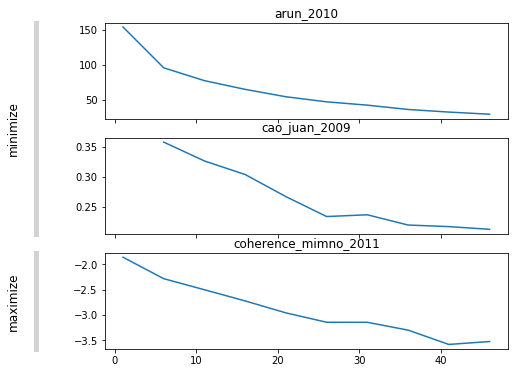

In [ ]:
plot_eval_results(results_by_n_topics)

## Lower Beta

In [ ]:
const_params = {'n_iter': 500,'eta': 0.01, 'random_state': 20191122}
ks = list(range(1, 50, 5))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/k) for k in ks]
print(varying_params)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 6, 'alpha': 0.16666666666666666}, {'n_topics': 11, 'alpha': 0.09090909090909091}, {'n_topics': 16, 'alpha': 0.0625}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 26, 'alpha': 0.038461538461538464}, {'n_topics': 31, 'alpha': 0.03225806451612903}, {'n_topics': 36, 'alpha': 0.027777777777777776}, {'n_topics': 41, 'alpha': 0.024390243902439025}, {'n_topics': 46, 'alpha': 0.021739130434782608}]


In [ ]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm_neg,
    varying_params,
    const_params)

In [ ]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 153.96324418591306, 'coherence_mimno_2011': -1.8568348784711388}), (6, {'cao_juan_2009': 0.3088957684016176, 'arun_2010': 94.76544739799154, 'coherence_mimno_2011': -2.356115769954248}), (11, {'cao_juan_2009': 0.2531460405109464, 'arun_2010': 73.02701250934004, 'coherence_mimno_2011': -2.6894096545673465}), (16, {'cao_juan_2009': 0.21052963103553266, 'arun_2010': 58.54178455266061, 'coherence_mimno_2011': -3.0462212461810596}), (21, {'cao_juan_2009': 0.18703554867687688, 'arun_2010': 48.79789595044325, 'coherence_mimno_2011': -3.6455703190558273}), (26, {'cao_juan_2009': 0.16557778339664855, 'arun_2010': 40.01779389161517, 'coherence_mimno_2011': -3.70893752398967}), (31, {'cao_juan_2009': 0.15678602140294406, 'arun_2010': 34.679775625146554, 'coherence_mimno_2011': -3.8427025593659514}), (36, {'cao_juan_2009': 0.1393460053847307, 'arun_2010': 28.65161280328217, 'coherence_mimno_2011': -4.100532624362594}), (41, {'cao_juan_2009': 0.1373064869551

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc07d2239d0>,
       dtype=object))

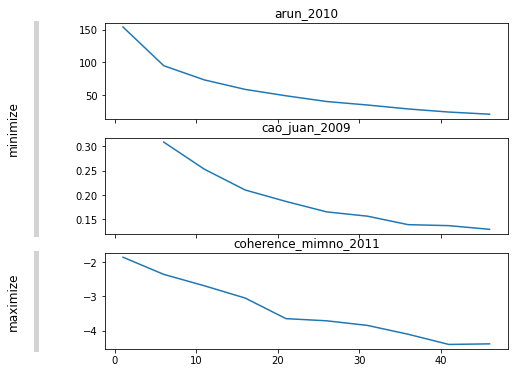

In [ ]:
plot_eval_results(results_by_n_topics)

## Eval Higher Beta

In [ ]:
const_params = {'n_iter': 500,'eta': 0.5, 'random_state': 20191122}
ks = list(range(1, 50, 5))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/k) for k in ks]
print(varying_params)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 6, 'alpha': 0.16666666666666666}, {'n_topics': 11, 'alpha': 0.09090909090909091}, {'n_topics': 16, 'alpha': 0.0625}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 26, 'alpha': 0.038461538461538464}, {'n_topics': 31, 'alpha': 0.03225806451612903}, {'n_topics': 36, 'alpha': 0.027777777777777776}, {'n_topics': 41, 'alpha': 0.024390243902439025}, {'n_topics': 46, 'alpha': 0.021739130434782608}]


In [ ]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm_neg,
    varying_params,
    const_params)

In [ ]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 154.10543277374092, 'coherence_mimno_2011': -1.8568348784711388}), (6, {'cao_juan_2009': 0.4454511590945476, 'arun_2010': 100.16130742519647, 'coherence_mimno_2011': -2.205515546297936}), (11, {'cao_juan_2009': 0.431019180825776, 'arun_2010': 84.14375243965145, 'coherence_mimno_2011': -2.3172795377412663}), (16, {'cao_juan_2009': 0.4168876357307965, 'arun_2010': 73.14001663157325, 'coherence_mimno_2011': -2.3268850410144024}), (21, {'cao_juan_2009': 0.38368098889597774, 'arun_2010': 64.53963488674898, 'coherence_mimno_2011': -2.591319916653084}), (26, {'cao_juan_2009': 0.378044775136382, 'arun_2010': 59.049657691799446, 'coherence_mimno_2011': -2.8621756121257413}), (31, {'cao_juan_2009': 0.3880605754574584, 'arun_2010': 56.027924876258965, 'coherence_mimno_2011': -2.8100333239129753}), (36, {'cao_juan_2009': 0.3730887457077658, 'arun_2010': 50.65908559520511, 'coherence_mimno_2011': -2.9982007709006724}), (41, {'cao_juan_2009': 0.39469402984072

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc07cc7ea10>,
       dtype=object))

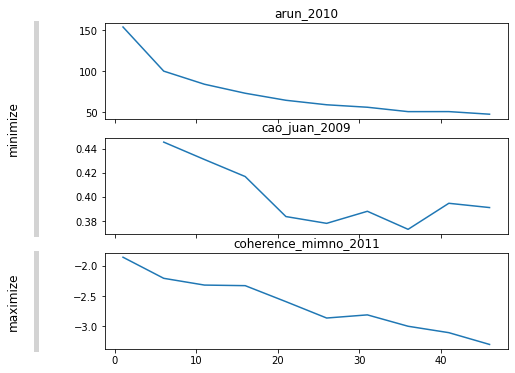

In [ ]:
plot_eval_results(results_by_n_topics)

## Eval Lower Alpha

In [ ]:
const_params = {'n_iter': 500,'eta': 0.1, 'random_state': 20191122}
ks = list(range(1, 50, 5))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/(10*k)) for k in ks]
print(varying_params)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
[{'n_topics': 1, 'alpha': 0.1}, {'n_topics': 6, 'alpha': 0.016666666666666666}, {'n_topics': 11, 'alpha': 0.00909090909090909}, {'n_topics': 16, 'alpha': 0.00625}, {'n_topics': 21, 'alpha': 0.004761904761904762}, {'n_topics': 26, 'alpha': 0.0038461538461538464}, {'n_topics': 31, 'alpha': 0.0032258064516129032}, {'n_topics': 36, 'alpha': 0.002777777777777778}, {'n_topics': 41, 'alpha': 0.0024390243902439024}, {'n_topics': 46, 'alpha': 0.002173913043478261}]


In [ ]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm_neg,
    varying_params,
    const_params)

In [ ]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 153.98953901259955, 'coherence_mimno_2011': -1.8568348784711388}), (6, {'cao_juan_2009': 0.6036428967075218, 'arun_2010': 105.17543962392706, 'coherence_mimno_2011': -2.1076734621052076}), (11, {'cao_juan_2009': 0.5021977213154712, 'arun_2010': 89.70096574684912, 'coherence_mimno_2011': -2.420648517174277}), (16, {'cao_juan_2009': 0.46882634623614405, 'arun_2010': 75.76264154649394, 'coherence_mimno_2011': -2.306754007224951}), (21, {'cao_juan_2009': 0.42768525804605323, 'arun_2010': 64.23676163945555, 'coherence_mimno_2011': -2.538824476953021}), (26, {'cao_juan_2009': 0.38343922769975286, 'arun_2010': 56.81233256969577, 'coherence_mimno_2011': -2.5675657686208977}), (31, {'cao_juan_2009': 0.38742399560101126, 'arun_2010': 54.91175832328876, 'coherence_mimno_2011': -2.702407866281994}), (36, {'cao_juan_2009': 0.3554164032739345, 'arun_2010': 49.43610782380128, 'coherence_mimno_2011': -2.939787779008515}), (41, {'cao_juan_2009': 0.34116695595650

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc07cb83ad0>,
       dtype=object))

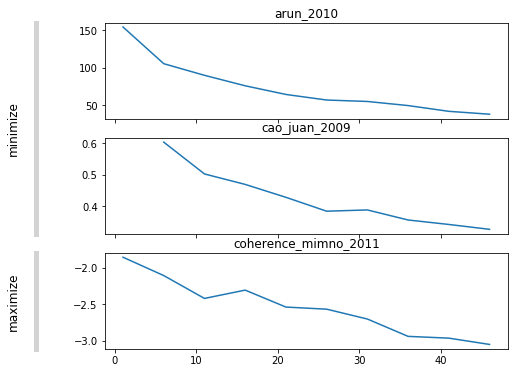

In [ ]:
plot_eval_results(results_by_n_topics)

# Classification

In [ ]:
try:
  import pyLDAvis
except:
  !pip install pyLDAvis==2.1.2
  import pyLDAvis
try:
  import tmtoolkit
except:
  !pip install tmtoolkit
  import tmtoolkit

import nltk
import random
import numpy as np
from tmtoolkit.corpus import Corpus
import json

try:
  from lda import LDA
except: 
  !pip install lda
  from lda import LDA

import logging
import warnings
from tmtoolkit.topicmod.tm_lda import compute_models_parallel

import pickle
import scipy.sparse

random.seed(20191120)   # to make the sampling reproducible
np.set_printoptions(precision=5)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 10.6 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=3cd779fb6e4f20ddadb7c55ecfbf64253195264ffadc7ca260e4f8a5f6f863b0
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/usr/local/lib/python3.7/dist-packa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.1 MB 8.6 MB/s 
     |████████████████████████████████| 9.5 MB 47.7 MB/s 
     |████████████████████████████████| 11.5 MB 40.1 MB/s 
     |████████████████████████████████| 25.9 MB 2.4 MB/s 
     |████████████████████████████████| 10.4 MB 56.7 MB/s 
     |████████████████████████████████| 96 kB 5.4 MB/s 
     |████████████████████████████████| 1.0 MB 41.5 MB/s 
  Created wheel for globre: filename=globre-0.1.5-py3-none-any.whl size=19546 sha256=cedc59c02b9ccdc0bb10d9d7d3a451128c08569668b6bab8b6ad969763d7bab4
  Stored in directory: /root/.cache/pip/wheels/40/95/37/5303ce04fce53b6e64ed74a3f0a0e9ea11c348cac0c5c42a76
Successfully built globre
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: xlrd
    Found existing installation: xlr

/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 351 kB 8.5 MB/s 
     |████████████████████████████████| 99 kB 6.0 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_directory = 'drive/MyDrive/Marketing_Unsupervised_Learning/Final_Project'
json_path = "%s/allnikereviews.json" % working_directory

In [ ]:
doc_labels_neg = pickle.load(open('%s/doc_labels_neg.p' % working_directory, 'rb'))
dtm_sm_neg = scipy.sparse.load_npz('%s/small_dtm_neg.npz' % working_directory)
dtm_bg_neg = scipy.sparse.load_npz('%s/big_dtm_neg.npz' % working_directory)

vocab_bg_neg = pickle.load(open('%s/big_vocab_neg.p' % working_directory, 'rb'))
vocab_sm_neg = pickle.load(open('%s/small_vocab_neg.p' % working_directory, 'rb'))

In [ ]:
# suppress the "INFO" messages and warnings from lda
logger = logging.getLogger('lda')
logger.addHandler(logging.NullHandler())
logger.propagate = False
warnings.filterwarnings('ignore')

### Creating Models

In [ ]:

# set data to use
dtms = {
    'smaller negative': dtm_sm_neg
}

# and fixed hyperparameters
lda_params = {
    'n_topics': 21,
    'eta': .5,
    'alpha': 1/21,
    'n_iter': 1000,
    'random_state': 20191122  # to make results reproducible
}

models = compute_models_parallel(dtms, constant_parameters=lda_params)

In [ ]:
from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words
model_sm = models['smaller negative'][0][1]
print_ldamodel_topic_words(model_sm.topic_word_, vocab_sm_neg, top_n=3)

topic_1
> #1. would (0.055123)
> #2. buy (0.036965)
> #3. get (0.030480)
topic_2
> #1. make (0.053404)
> #2. want (0.041667)
> #3. get (0.032277)
topic_3
> #1. get (0.057337)
> #2. back (0.033909)
> #3. know (0.031443)
topic_4
> #1. small (0.065682)
> #2. wear (0.045316)
> #3. order (0.037169)
topic_5
> #1. buy (0.046206)
> #2. get (0.042315)
> #3. go (0.038424)
topic_6
> #1. back (0.063035)
> #2. send (0.053244)
> #3. purchase (0.034884)
topic_7
> #1. run (0.047030)
> #2. buy (0.038119)
> #3. bad (0.038119)
topic_8
> #1. wide (0.049258)
> #2. well (0.042510)
> #3. narrow (0.039811)
topic_9
> #1. buy (0.093249)
> #2. last (0.054348)
> #3. one (0.046339)
topic_10
> #1. fall (0.057814)
> #2. apart (0.055273)
> #3. buy (0.041296)
topic_11
> #1. order (0.070302)
> #2. send (0.059790)
> #3. receive (0.050591)
topic_12
> #1. like (0.066376)
> #2. feel (0.058624)
> #3. wear (0.051841)
topic_13
> #1. use (0.042169)
> #2. good (0.032798)
> #3. get (0.027443)
topic_14
> #1. look (0.052727)
> #2.

## Topic Names and Classification

In [ ]:
from tmtoolkit.bow.bow_stats import doc_lengths
from tmtoolkit.topicmod.model_stats import generate_topic_labels_from_top_words

doc_lengths_sm = doc_lengths(dtm_sm_neg)
topic_labels = generate_topic_labels_from_top_words(
    model_sm.topic_word_,
    model_sm.doc_topic_,
    doc_lengths_sm,
    vocab_sm_neg,
    lambda_=0.7
)

In [ ]:
topic_labels

array(['1_would_replace', '2_make_want', '3_get_know', '4_small_12',
       '5_go_buy', '6_back_send', '7_run_bad', '8_wide_narrow',
       '9_buy_last', '10_fall_apart', '11_order_black', '12_feel_like',
       '13_use_good', '14_real_fake', '15_loud_take', '16_look_like',
       '17_make_wear', '18_break_buy', '19_return_make',
       '20_order_return', '21_back_get'], dtype='<U15')

In [ ]:
from tmtoolkit.topicmod.model_io import ldamodel_top_doc_topics
doc_topic = model_sm.doc_topic_
documentclassifications = ldamodel_top_doc_topics(doc_topic, doc_labels_neg, top_n=2, topic_labels=topic_labels) 

In [ ]:
import pandas as pd

In [ ]:
#documentclassifications.head()

In [ ]:
corpus = pickle.load(open('%s/corpus2.p' % working_directory, 'rb'))

In [ ]:
documentclassifications['text'] = np.nan
for index, arow in documentclassifications.iterrows():
  documentclassifications['text'][index] = corpus[index]

In [ ]:
documentclassifications.loc['1']

rank_1                             20_order_return (0.5655)
rank_2                              19_return_make (0.1905)
text      I'm on my 4th watch... I keep returning it due...
Name: 1, dtype: object

In [ ]:
documentclassifications.loc['1']['text']

"I'm on my 4th watch... I keep returning it due to poor design.  The band keeps coming apart in the same spot!  Nike hasn't been helpful when I've been in contact with them.  Now, I'm on my 4th watch and something funking is going on with the face of this watch and I've brought it in to a jeweler to have the battery changed.. TWICE and it's still acting up.  I wouldn't purchase another NIKE watch."

In [ ]:
documentclassifications.to_excel('%s/topics.documentclassification.xlsx' % working_directory)

In [ ]:
from tmtoolkit.topicmod.visualize import parameters_for_ldavis

ldavis_params = parameters_for_ldavis(model_sm.topic_word_,
                                      model_sm.doc_topic_,
                                      dtm_sm_neg,
                                      vocab_sm_neg)

In [ ]:
from tmtoolkit.topicmod.visualize import generate_wordclouds_for_topic_words

# some options for wordcloud output
img_w = 400   # image width
img_h = 300   # image height

topic_clouds = generate_wordclouds_for_topic_words(
    model_sm.topic_word_, vocab_sm_neg,
    top_n=20, topic_labels=topic_labels,
    width=img_w, height=img_h
)

# show all generated word clouds
topic_clouds.keys()

dict_keys(['1_would_replace', '2_make_want', '3_get_know', '4_small_12', '5_go_buy', '6_back_send', '7_run_bad', '8_wide_narrow', '9_buy_last', '10_fall_apart', '11_order_black', '12_feel_like', '13_use_good', '14_real_fake', '15_loud_take', '16_look_like', '17_make_wear', '18_break_buy', '19_return_make', '20_order_return', '21_back_get'])

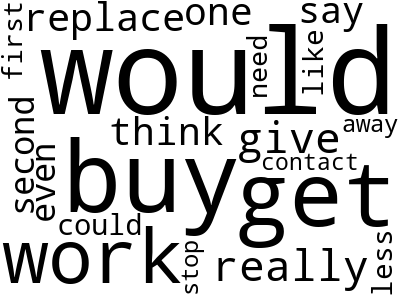

In [ ]:
topic_clouds['1_would_replace']

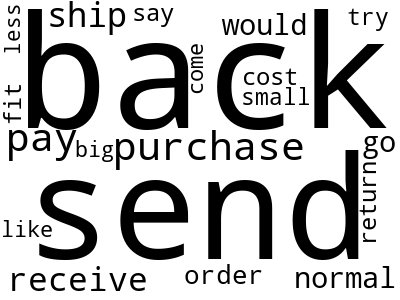

In [ ]:
topic_clouds['6_back_send']

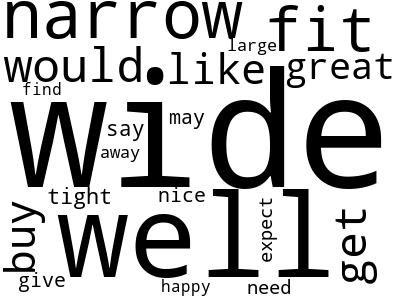

In [ ]:
topic_clouds['8_wide_narrow']

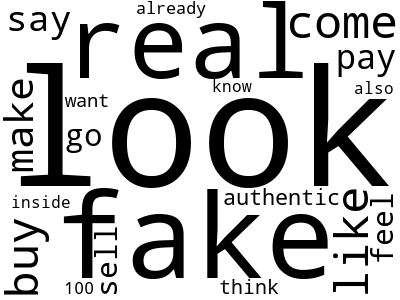

In [ ]:
topic_clouds['14_real_fake']

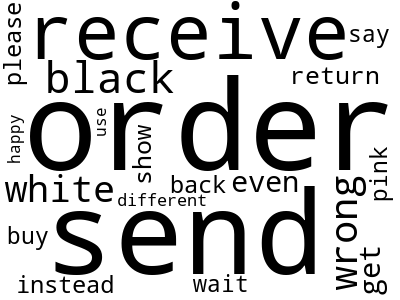

In [ ]:
topic_clouds['11_order_black']

# Topic Modeling with BERTopic

In [ ]:
import json
import pandas as pd
import os
try:
  from bertopic import BERTopic
except:
  !pip install bertopic[all]
  os.kill(os.getpid(), 9)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_directory = 'drive/MyDrive/Marketing_Unsupervised_Learning/Final_Project'
json_path = "%s/allnikereviews.json" % working_directory
json_file = json.load(open(json_path, 'r'))

In [ ]:
df = pd.read_json('drive/MyDrive/Marketing_Unsupervised_Learning/Final_Project/allnikereviews.json', orient='index')

In [ ]:
negative = df[(df['overall'] == 1)]

In [ ]:
neg = negative.reset_index(drop=True)

In [ ]:
b = neg.to_dict(orient = 'index')

In [ ]:
allreviewtext = []
for areview in b:
  allreviewtext.append(b[areview]['reviewText'])

In [ ]:
len(allreviewtext)

1243

In [ ]:
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(allreviewtext)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Batches:   0%|          | 0/39 [00:00<?, ?it/s]

2022-06-03 18:21:11,755 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2022-06-03 18:21:26,286 - BERTopic - Reduced dimensionality
2022-06-03 18:21:26,373 - BERTopic - Clustered reduced embeddings


## Extracting Topics

In [ ]:
freq = topic_model.get_topic_info(); freq.head(5)

,Topic,Count,Name
0,0,1104,0_the_and_to_of
1,1,139,1_watch_the_it_to


In [ ]:
topic_model.get_topic(0)  # Select the most frequent topic

[('the', 0.1226312069283534),
 ('and', 0.0820134147955848),
 ('to', 0.07451743057510261),
 ('of', 0.05946631460170428),
 ('they', 0.05295465223975309),
 ('shoes', 0.05285020395469197),
 ('for', 0.05112947203775947),
 ('not', 0.04812367581928727),
 ('is', 0.047972893832918535),
 ('my', 0.04787900067991311)]

## Visualization

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=50)

# Trying Again 

In [ ]:
working_directory = 'drive/MyDrive/Marketing_Unsupervised_Learning/Final_Project'
json_path = "%s/allnikereviews.json" % working_directory
json_file = json.load(open(json_path, 'r'))

In [ ]:
allreviewtext = []
for areview in json_file:
  allreviewtext.append(json_file[areview]['reviewText'])

In [ ]:
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(allreviewtext)

Batches:   0%|          | 0/675 [00:00<?, ?it/s]

2022-06-03 18:43:17,739 - BERTopic - Transformed documents to Embeddings
2022-06-03 18:44:11,311 - BERTopic - Reduced dimensionality
2022-06-03 18:44:52,235 - BERTopic - Clustered reduced embeddings


In [ ]:
freq = topic_model.get_topic_info(); freq.head(5)

,Topic,Count,Name
0,-1,7876,-1_shoes_shoe_them_and
1,0,1142,0_watch_it_band_wrist
2,1,1055,1_nike_nikes_as_of
3,2,645,2_socks_sock_are_they
4,3,512,3_running_run_shoes_runner


In [ ]:
topic_model.get_topic(0)  # Select the most frequent topic

[('watch', 0.035799559412178036),
 ('it', 0.012771515914620515),
 ('band', 0.011974676486615387),
 ('wrist', 0.01050496037770599),
 ('watches', 0.009048698806764675),
 ('battery', 0.00901343802823276),
 ('is', 0.008540975328548405),
 ('this', 0.008299059492684821),
 ('the', 0.007595207988257942),
 ('its', 0.007227063955332146)]

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=50)

In [ ]:
topic_model.visualize_topics()

In [ ]:
working_directory = 'drive/MyDrive/Marketing_Unsupervised_Learning/Final_Project'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import gzip
path = working_directory

def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.dumps(eval(l))

f = open("output.strict", 'w')
for l in parse("drive/MyDrive/Marketing_Unsupervised_Learning/Final_Project/meta_Clothing_Shoes_and_Jewelry.jsonl.gz"):
  f.write(l + '\n')

In [ ]:
f

<_io.TextIOWrapper name='output.strict' mode='w' encoding='UTF-8'>